<a href="https://colab.research.google.com/github/saagarpagar/Breast-Cancer-Prediction-Model/blob/main/ML_Day_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Breast Cancer Classification Prediction Model

# 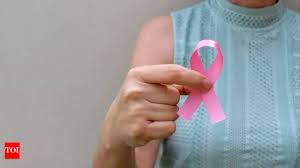

In [ ]:
#import all the esential libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'breast-cancer-dataset' dataset.
Path to dataset files: /kaggle/input/breast-cancer-dataset


In [36]:
df = pd.read_csv(path  + "/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#x & y
x = df.drop('id','diagnosis',axis=1)
y = df['diagnosis']

In [11]:
df.value_counts('diagnosis')

,count
diagnosis,
B,357
M,212


In [12]:
# What is the distribution of malignant (M) and benign (B) diagnoses in the dataset?
diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)

diagnosis
B    357
M    212
Name: count, dtype: int64


In [13]:
# How do the mean values of different features compare between malignant and benign tumors?
mean_features_by_diagnosis = df.groupby('diagnosis').mean()
display(mean_features_by_diagnosis)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


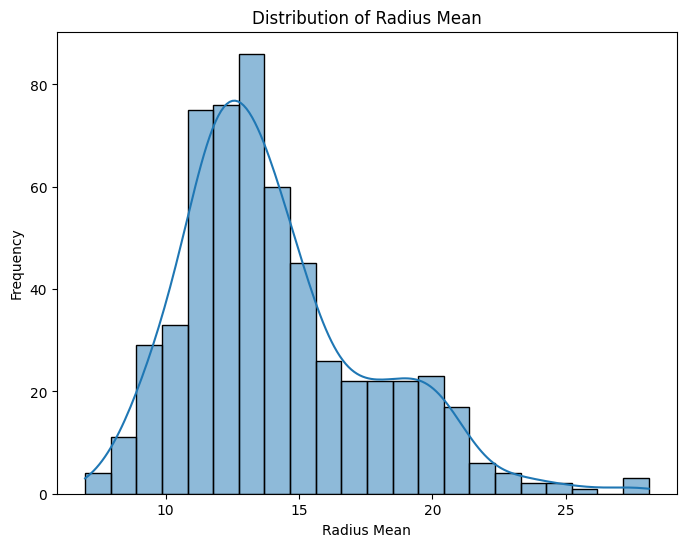

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a histogram of the 'radius_mean' feature
plt.figure(figsize=(8, 6))
sns.histplot(df['radius_mean'], kde=True)
plt.title('Distribution of Radius Mean')  # Set the title of the plot
plt.xlabel('Radius Mean')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()

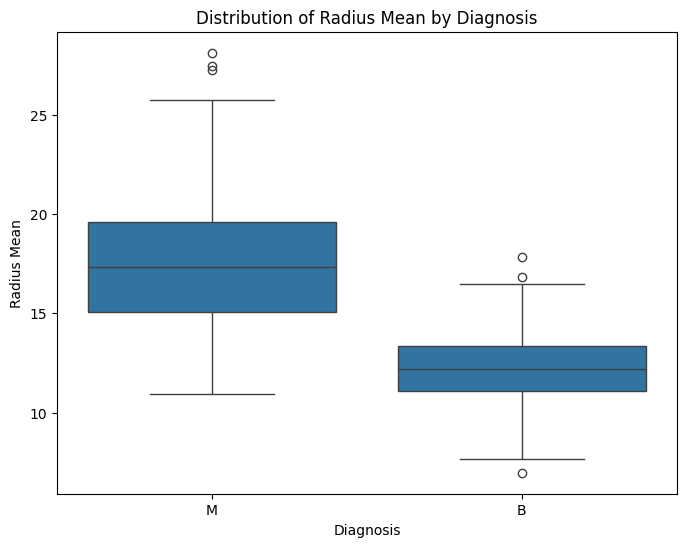

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of 'radius_mean' by 'diagnosis'
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Distribution of Radius Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.show()

In [19]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [27]:
#Train test split divide data into 80% and 20% ratio for best training
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [28]:
#call the model
knn_model = KNeighborsClassifier()
NB_model = GaussianNB()
LR_model = LogisticRegression()
SVM_model = SVC()

In [29]:
#Train the model
knn_model.fit(x_train,y_train)
NB_model.fit(x_train,y_train)
LR_model.fit(x_train,y_train)
SVM_model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [30]:
#Test the model
knn_pred = knn_model.predict(x_test)
#knn classification report, evaluation accuracy score
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           B       0.74      0.91      0.81        75
           M       0.68      0.38      0.49        39

    accuracy                           0.73       114
   macro avg       0.71      0.65      0.65       114
weighted avg       0.72      0.73      0.70       114



In [31]:
#Test the model
NB_pred = NB_model.predict(x_test)
#NB classifiaction report, evaluation accuracy score
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

           B       0.65      0.99      0.79        75
           M       0.00      0.00      0.00        39

    accuracy                           0.65       114
   macro avg       0.33      0.49      0.39       114
weighted avg       0.43      0.65      0.52       114



In [32]:
#Test the model
LR_pred = LR_model.predict(x_test)
# LR classifiaction report, evaluation accuracy score
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           B       0.86      0.97      0.91        75
           M       0.93      0.69      0.79        39

    accuracy                           0.88       114
   macro avg       0.89      0.83      0.85       114
weighted avg       0.88      0.88      0.87       114



In [33]:
#Test the model
SVM_pred = SVM_model.predict(x_test)
#SVM classification report, evaluation accuracy score
print(classification_report(y_test,SVM_pred))

              precision    recall  f1-score   support

           B       0.66      1.00      0.79        75
           M       0.00      0.00      0.00        39

    accuracy                           0.66       114
   macro avg       0.33      0.50      0.40       114
weighted avg       0.43      0.66      0.52       114



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
import pickle

# Save the best model (Logistic Regression) to a pickle file
with open('LR_model.pkl', 'wb') as f:
    pickle.dump(LR_model, f)

print("Best model (Logistic Regression) saved as LR_model.pkl")

Best model (Logistic Regression) saved as LR_model.pkl
